In [52]:
%run "00_setup_paths_and_imports.py"

In [53]:
# --- Simulation Settings ---
dt = 0.1  # years
total_time = 15  # years
nt = int(total_time / dt) # number of time steps
times = np.linspace(0, total_time, nt + 1)
#print(times)

# choose the simulation start date
sim_start = pd.Timestamp("2010-01-01")
# Anchor on your sim_start and use your DAYS_PER_YEAR
sim_end = sim_start + pd.to_timedelta(total_time * DAYS_PER_YEAR, unit="D")

start_time = sim_start.strftime("%Y-%m-%d")
end_time   = sim_end.strftime("%Y-%m-%d")

# --- Interpolate monthly series to model step centers ---
edges   = sim_start + pd.to_timedelta(times * DAYS_PER_YEAR, unit="D")
centers = edges[:-1] + (edges[1:] - edges[:-1]) / 2


print(sim_start, sim_end)
print("Simulation start:", start_time, " end:", end_time)
print("Edges:", edges)
print("Centers:", centers)

2010-01-01 00:00:00 2024-12-31 15:17:59.999999982
Simulation start: 2010-01-01  end: 2024-12-31
Edges: DatetimeIndex([          '2010-01-01 00:00:00',
                  '2010-02-06 12:34:55.200000',
                  '2010-03-15 01:09:50.400000',
                  '2010-04-20 13:44:45.600000',
                  '2010-05-27 02:19:40.800000',
                         '2010-07-02 14:54:36',
                  '2010-08-08 03:29:31.200000',
                  '2010-09-13 16:04:26.400000',
                  '2010-10-20 04:39:21.600000',
                  '2010-11-25 17:14:16.800000',
               ...
               '2024-02-06 22:03:43.200000069',
               '2024-03-14 10:38:38.400000025',
               '2024-04-19 23:13:33.600000060',
               '2024-05-26 11:48:28.800000017',
               '2024-07-02 00:23:23.999999974',
               '2024-08-07 12:58:19.200000086',
               '2024-09-13 01:33:14.400000043',
               '2024-10-19 14:08:09.599999991',
              

In [ ]:
# Choose which region you are working with
region_name = "mike_station" # options: "mike_station", "coast"

# Region-specific coordinates
if region_name == "mike_station":
    lat_min = 64.861098
    lat_max = 67.138902
    lon_min = -0.796979
    lon_max = 4.796979

    kollsnes_lat, kollsnes_lon = 60.55310, 4.88361
    data_lat, data_lon = 59.3167, 4.8000
    mike_lat, mike_lon = 66, 2

    mld_id =   "cmems_mod_arc_phy_my_topaz4_P1M"
    bathy_id = "cmems_mod_arc_phy_my_topaz4_P1M"
    sst_id =   "cmems_mod_arc_phy_my_topaz4_P1M"
    npp_id =   "cmems_mod_arc_bgc_my_ecosmo_P1M"
    kd_id =    "cmems_mod_arc_bgc_my_ecosmo_P1M" 

    params = {
        'T1_star': 8.5,   # °C       
        'T2_star': 2,   # °C       
        'S1_star': 35.08, # psu      
        'S2_star': 34.95,  # psu

        'A_1T': 2.5,  # °C          
        'A_2T': 2.2,  # °C         
        'A_1S': 0.16, # psu          
        'A_2S': 0.08,  # psu      

        # 1 month = 1/12 year = (2π / 12) = 0.524 radians of phase shift.
        'phi_1T': 2.242, # radians    
        'phi_2T': 3.4, # radians  
        'phi_1S': -0.858, # radians   
        'phi_2S': -2,  # radians  

        'tau_1T': 0.09, # yr       
        'tau_1S': 0.25, # yr         
        'tau_2': 0.4,  # yr        

        'Omega_crit_diss': 1.0,         # saturation state where minimum dissolution occurs
        'f_diss_min': 0.1,              # minimum fraction of PIC that dissolves in box 2 even if supersaturated
        'f_diss_max': 0.9,              # maximum fraction that dissolves if strongly undersaturated

        'Omega_crit_calc': 3.5,         # typical modern surface Ω_calcite ~3-4
        'PICPOC_max': 0.07,             # baseline PIC:POC rain ratio at healthy saturation
        'PICPOC_min': 0.01,             # floor for PIC:POC when it's hard to calcify
    }

    # --- Initial Conditions ---
    initial_state = np.array([
        8,  # T1 °C
        2,   # T2 °C
        35,  # S1 psu
        35,  # S2 psu
        2160, # DIC1 µmol/kg
        2160, # DIC2 µmol/kg
        2330, # TA1 µmol/kg
        2305  # TA2 µmol/kg
    ])
    

elif region_name == "coast":
    lat_min = 59.015176
    lat_max = 61.984824
    lon_min = 1.431594
    lon_max = 5.000000

    kollsnes_lat, kollsnes_lon = 60.55310, 4.88361
    data_lat, data_lon = 59.3167, 4.8000
    mike_lat, mike_lon = 66, 2

    mld_id = "cmems_mod_nws_phy-mld_my_7km-2D_P1M-m"
    bathy_id = "cmems_mod_nws_phy_my_7km-3D_static"
    sst_id = "cmems_mod_nws_phy-t_my_7km-3D_P1M-m"
    npp_id = "cmems_mod_nws_bgc-pp_my_7km-3D_P1M-m"
    kd_id = "cmems_mod_nws_bgc-kd_my_7km-3D_P1M-m"

    params = {
        'T1_star': 8.5,   # °C       
        'T2_star': 2,   # °C       
        'S1_star': 35.08, # psu      
        'S2_star': 34.95,  # psu

        'A_1T': 2.5,  # °C          
        'A_2T': 2.2,  # °C         
        'A_1S': 0.16, # psu          
        'A_2S': 0.08,  # psu      

        # 1 month = 1/12 year = (2π / 12) = 0.524 radians of phase shift.
        'phi_1T': 2.242, # radians    
        'phi_2T': 3.4, # radians  
        'phi_1S': -0.858, # radians   
        'phi_2S': -2,  # radians  

        'tau_1T': 0.09, # yr       
        'tau_1S': 0.25, # yr         
        'tau_2': 0.4,  # yr        

        'Omega_crit_diss': 1.0,         # saturation state where minimum dissolution occurs
        'f_diss_min': 0.1,              # minimum fraction of PIC that dissolves in box 2 even if supersaturated
        'f_diss_max': 0.9,              # maximum fraction that dissolves if strongly undersaturated

        'Omega_crit_calc': 3.5,         # typical modern surface Ω_calcite ~3-4
        'PICPOC_max': 0.07,             # baseline PIC:POC rain ratio at healthy saturation
        'PICPOC_min': 0.01,             # floor for PIC:POC when it's hard to calcify
    }

    # --- Initial Conditions ---
    initial_state = np.array([
        8,  # T1 °C
        2,   # T2 °C
        35,  # S1 psu
        35,  # S2 psu
        2160, # DIC1 µmol/kg
        2160, # DIC2 µmol/kg
        2330, # TA1 µmol/kg
        2305  # TA2 µmol/kg
    ])
    
else:
    raise ValueError(f"Unknown region_name: {region_name}")

# For convenience, collect into a dict we can save/use elsewhere
region = {
    "name": region_name,
    "lat_min": lat_min,
    "lat_max": lat_max,
    "lon_min": lon_min,
    "lon_max": lon_max,
    "kollsnes_lat": kollsnes_lat,
    "kollsnes_lon": kollsnes_lon,
    "data_lat": data_lat,
    "data_lon": data_lon,
    "mike_lat": mike_lat,
    "mike_lon": mike_lon,
    "mld_id": mld_id,
    "bathy_id": bathy_id,
    "sst_id": sst_id,
    "npp_id": npp_id,
    "kd_id": kd_id
}


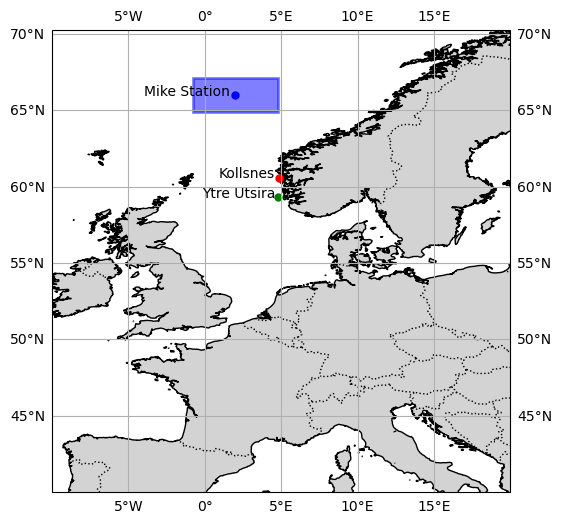

In [55]:
# --- Create a map for the selected region ---
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_extent([-10, 20, 40, 70])  # wider map view around area

# --- Add rectangle for your lat/lon range ---
rect = Rectangle(
    (lon_min, lat_min),             # lower-left corner
    lon_max - lon_min,              # width (in degrees)
    lat_max - lat_min,              # height (in degrees)
    linewidth=2,
    edgecolor='blue',
    facecolor='blue',
    alpha=0.5,  # semi-transparent
    transform=ccrs.PlateCarree()
)

# --- Add port and reference points ---
ax.plot(kollsnes_lon, kollsnes_lat, 'ro', markersize=5,
        transform=ccrs.PlateCarree(), label='Kollsnes Port')
ax.text(kollsnes_lon - 4, kollsnes_lat + 0.1, 'Kollsnes',
        transform=ccrs.PlateCarree())

ax.plot(data_lon, data_lat, 'go', markersize=5,
        transform=ccrs.PlateCarree(), label='Ytre Utsira')
ax.text(data_lon - 5, data_lat, 'Ytre Utsira',
        transform=ccrs.PlateCarree())

ax.plot(mike_lon, mike_lat, 'bo', markersize=5,
        transform=ccrs.PlateCarree(), label='Mike Station')
ax.text(mike_lon - 6, mike_lat, 'Mike Station',
        transform=ccrs.PlateCarree())

ax.add_patch(rect)
ax.gridlines(draw_labels=True)

plt.savefig(IMG_DIR / f"map_area_{region_name}.png", dpi=300, transparent=True)
plt.show()


In [56]:
# --- Compute area of the region ---
lat_min_rad = math.radians(lat_min)
lat_max_rad = math.radians(lat_max)
lon_min_rad = math.radians(lon_min)
lon_max_rad = math.radians(lon_max)

R = 6371000.0   # Earth radius in meters

delta_lon = abs(lon_max_rad - lon_min_rad)

area_m2 = R**2 * delta_lon * abs(math.sin(lat_max_rad) - math.sin(lat_min_rad))
area_km2 = area_m2 / 1e6

print(f"Area ≈ {area_m2:.2f} m²")
print(f"Area ≈ {area_km2:.2f} km²")

region["area_m2"] = area_m2
region["area_km2"] = area_km2


Area ≈ 64075233554.54 m²
Area ≈ 64075.23 km²


In [57]:
config = {
    "region": region,
    "dt": dt,
    "nt": nt,
    "total_time": total_time,
    "times": times,
    "edges": edges,
    "centers": centers,
    "sim_start": sim_start,
    "sim_end": sim_end,
    "start_time_str": start_time,
    "end_time_str": end_time,
    "params": params,           
    "initial_state": initial_state
}

np.save(DATA_INTERIM / f"config_{region_name}.npy", config, allow_pickle=True)
